<a href="https://colab.research.google.com/github/ricardooschutz/BigData_TrabajoPractico/blob/main/BigDataTP_TwitterScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the Tweet

In [78]:
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from config import *
import tweepy
import datetime
import pandas as pd
import re
from wordcloud import WordCloud
from textblob import TextBlob

In [80]:
#Tokens Twitter Credentials
TWITTER_CONSUMER_KEY = 'e27sd02R39EIsSHfrTUCiOwXT'
TWITTER_CONSUMER_SECRET = 'X0K7qJC7lZ9An1NXWJ3yYijOp4tAFPWcd3OjcBP15djPe9m5KZ'
TWITTER_ACCESS_TOKEN = '175984347-MCv5cbRKRBxXOFKDUfsQVtGhuPy42aRDn53UWP4L'
TWITTER_ACCESS_TOKEN_SECRET = 'XMEe25XGwoeozruLf9Y1zK5wYlTup9U0xLHLG4BT3JffE'

In [81]:
#Autenticacion de los Tokens
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [82]:
#Setear fechas
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=5)

In [83]:
#Ingreso de tema y cantidad de Tweets
hashtag = input("Ingrese el hashtag del tema que quieres buscar en Twitter: ")
cant_tweets = int(input("Ingrese la cantidad de tweets que deseas ver: "))

Ingrese el hashtag del tema que quieres buscar en Twitter: Ucrania
Ingrese la cantidad de tweets que deseas ver: 100


In [84]:
#Extraccion de Tweeets de tema seleccionado
tweets = tweepy.Cursor(api.search, q=hashtag, lang='es').items(cant_tweets)
tweet_list = [[tweet.text, tweet.user.screen_name, tweet.created_at, tweet.retweet_count, tweet.favorite_count] for tweet in tweets]

In [85]:
#Mostrar los tweets
tweet_list

[['RT @dw_espanol: 🇪🇺 🇷🇺 🇺🇦 Josep Borrell, jefe de la diplomacia de la #UE, atribuye la inseguridad alimentaria mundial al bloqueo ruso de pue…',
  'mindiespe',
  datetime.datetime(2022, 6, 20, 23, 48, 13),
  44,
  0],
 ['RT @EFEnoticias: La Iniciativa de los Tres Mares, que engloba doce Estados miembros de la UE ubicados entre los mares Báltico, Adriático y…',
  'RaiderJ0KER',
  datetime.datetime(2022, 6, 20, 23, 48, 12),
  12,
  0],
 ['RT @VanessaOrtizz: Rusia informa que dejó polvo cósmico cuatro cañones Howitzer suministrados a Ucrania por EEUU en Donetsk.',
  'lucy13mujer',
  datetime.datetime(2022, 6, 20, 23, 48, 11),
  337,
  0],
 ['RT @REjercitos: 🇷🇺🔥🇺🇦 #Rusia vs #Ucrania (día 117) - Según oficiales del Pentágono, una guerra prolongada hará que Rusia se muestre más agr…',
  'marcovallejob',
  datetime.datetime(2022, 6, 20, 23, 48, 9),
  7,
  0],
 ['RT @pueblopatriota: Azmilitary1:\nLa crisis por la situación en Ucrania será duradera, Rusia nunca volverhá a confiar en Occidente,

##Creamos el dataframe y convertimos el archivo a un csv

In [87]:
tweets_df = pd.DataFrame(tweet_list)
tweets_df.columns = ['Tweet' , 'Autor', 'Fecha', 'Likes', 'Retweets']
tweets_df

,Tweet,Autor,Fecha,Likes,Retweets
0,"RT @dw_espanol: 🇪🇺 🇷🇺 🇺🇦 Josep Borrell, jefe d...",mindiespe,2022-06-20 23:48:13,44,0
1,RT @EFEnoticias: La Iniciativa de los Tres Mar...,RaiderJ0KER,2022-06-20 23:48:12,12,0
2,RT @VanessaOrtizz: Rusia informa que dejó polv...,lucy13mujer,2022-06-20 23:48:11,337,0
3,RT @REjercitos: 🇷🇺🔥🇺🇦 #Rusia vs #Ucrania (día ...,marcovallejob,2022-06-20 23:48:09,7,0
4,RT @pueblopatriota: Azmilitary1:\nLa crisis po...,Luisbasaragua6,2022-06-20 23:48:07,11,0
...,...,...,...,...,...
95,RT @AngAsgg: Los Valores Europeos que nos unen...,hergarjoel,2022-06-20 23:46:08,1,0
96,RT @MrAnkonian: Casi todas las petroleras del ...,Theevilreapeer,2022-06-20 23:46:04,7,0
97,RT @andahazi: Los bombardeos rusos sobre Ucran...,xmasrepublica,2022-06-20 23:46:04,174,0
98,RT @jenarovillamil: Inicia el Global Media Fór...,georyano,2022-06-20 23:46:02,13,0


In [88]:
#Creacion de csv de los Tweets
tweets_df.to_csv("Tweets_" + hashtag + ".csv")

#Limpieza de Tweets (Parte 2)







In [89]:
#import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
#import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [90]:
#Leer  el CSV
tweets_list = pd.read_csv("Tweets_" + hashtag + ".csv")

In [91]:
# Funcion para Limpieza de Tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 return text

In [92]:
# Limpiar los tweets
tweets_list['Tweet'] = tweets_list['Tweet'].apply(cleanTxt)

In [93]:
##Quitar los emojis ..
def borrarEmojis(text):
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'',text)

In [94]:
#aplicar la eliminacion de emojis
tweets_list['Tweet'] = tweets_list['Tweet'].apply(borrarEmojis)

In [112]:
# Show all the cleaned tweets
tweets_list

,Unnamed: 0,Tweet,Autor,Fecha,Likes,Retweets,Subjectividad,Polaridad,Analisis
0,0,"_espanol: Josep Borrell, jefe de la diploma...",mindiespe,2022-06-20 23:48:13,44,0,0.00,0.0,Neutral
1,1,": La Iniciativa de los Tres Mares, que engloba...",RaiderJ0KER,2022-06-20 23:48:12,12,0,0.00,0.0,Neutral
2,2,: Rusia informa que dejó polvo cósmico cuatro ...,lucy13mujer,2022-06-20 23:48:11,337,0,0.00,0.0,Neutral
3,3,: Rusia vs Ucrania (día 117) - Según oficiale...,marcovallejob,2022-06-20 23:48:09,7,0,0.00,0.0,Neutral
4,4,: Azmilitary1:\nLa crisis por la situación en ...,Luisbasaragua6,2022-06-20 23:48:07,11,0,0.00,0.0,Neutral
...,...,...,...,...,...,...,...,...,...
95,95,: Los Valores Europeos que nos unen contra Rus...,hergarjoel,2022-06-20 23:46:08,1,0,0.00,0.0,Neutral
96,96,: Casi todas las petroleras del mundo caen hoy...,Theevilreapeer,2022-06-20 23:46:04,7,0,0.00,0.0,Neutral
97,97,: Los bombardeos rusos sobre Ucrania mataron h...,xmasrepublica,2022-06-20 23:46:04,174,0,0.55,-0.4,Negativo
98,98,: Inicia el Global Media Fórum organizado por ...,georyano,2022-06-20 23:46:02,13,0,0.00,0.0,Neutral


#Analisis de Sentimiento de los Tweets con TextBlob



In [96]:
# crear la funcion para obtener la subjectividad
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Crear la funcion para obtener la polaridad
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Crear dos nuevas columnas 'Subjectividad' & 'Polaridad'
tweets_list['Subjectividad'] = tweets_list['Tweet'].apply(getSubjectivity)
tweets_list['Polaridad'] = tweets_list['Tweet'].apply(getPolarity)

# Crear una funcion para calcular negativo (-1), neutral (0) and positivo (+1) 
def getAnalysis(score):
  if score < 0:
    return 'Negativo'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positivo'

tweets_list['Analisis'] = tweets_list['Polaridad'].apply(getAnalysis)

# Show the dataframe
tweets_list.head(10)

,Unnamed: 0,Tweet,Autor,Fecha,Likes,Retweets,Subjectividad,Polaridad,Analisis
0,0,"_espanol: Josep Borrell, jefe de la diploma...",mindiespe,2022-06-20 23:48:13,44,0,0.0,0.0,Neutral
1,1,": La Iniciativa de los Tres Mares, que engloba...",RaiderJ0KER,2022-06-20 23:48:12,12,0,0.0,0.0,Neutral
2,2,: Rusia informa que dejó polvo cósmico cuatro ...,lucy13mujer,2022-06-20 23:48:11,337,0,0.0,0.0,Neutral
3,3,: Rusia vs Ucrania (día 117) - Según oficiale...,marcovallejob,2022-06-20 23:48:09,7,0,0.0,0.0,Neutral
4,4,: Azmilitary1:\nLa crisis por la situación en ...,Luisbasaragua6,2022-06-20 23:48:07,11,0,0.0,0.0,Neutral
5,5,: Las fuerzas especiales rusas del grupo🅾️ des...,FreddyJohans,2022-06-20 23:48:06,26,0,0.0,0.0,Neutral
6,6,_token: Las naciones de la UE presionan por nu...,bagdoliofig,2022-06-20 23:48:03,118,0,0.0,0.0,Neutral
7,7,: ALERTA De acuerdo con reportes del Min de De...,JeanC1981,2022-06-20 23:48:02,27,0,0.0,0.0,Neutral
8,8,2: Uyy esto no le va a gustar al tal Ricardo A...,amercamp2013,2022-06-20 23:48:02,1198,0,0.0,0.0,Neutral
9,9,": MIENTE\n‼️ Por supuesto, Ucrania nunca se un...",chugar_jhonson,2022-06-20 23:48:01,16,0,0.0,0.0,Neutral


In [111]:
#Guardamos un csv de los Tweets analizadps
tweets_list.to_csv("Analisis_de_" + hashtag + ".csv")

In [97]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = tweets_list.sort_values(by=['Polaridad']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  j= j+1
  if( sortedDF['Analisis'][i] == 'Positivo'):
    print(str(j) + ') '+ sortedDF['Tweet'][i])
    print()
    

Printing positive tweets:

24) Entre ellos, en particular, el caso contra un soldado del 23.º batallón separado de infantería motorizada de las Fu… 

38) : 1 Por semanas reportamos el REAL CURSO de la guerra: gravísimas pérdidas humanas/materiales ucranianas
Por eso, NO NOS E…

95) : 2) Hay una guerra en Rusia y Ucrania! Es normal que la comida esté cara

3) Vivimos 20 años de uribismo, es obvio que iba a…



In [98]:
#Imprimir los mas negativos primero...
print('Printing negative tweets:\n')
j=1
sortedDF = tweets_list.sort_values(by=['Polaridad']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analisis'][i] == 'Negativo'):
    print(str(j) + ') '+ sortedDF['Tweet'][i])
    print()
   

Printing negative tweets:

1) : Los bombardeos rusos sobre Ucrania mataron hasta la fecha 323 niños y provocaron heridas a 586. A este criminal el presidente…

1) : Hoy en el episodio de "En Ucrania no hay nazis, es propaganda del Kremlin", un nuevo soldado nazi capturado en el frent…

1) : La "prensa" otanista: En Ucrania no hay nazis, es un mito, una leyenda, es propaganda del Kremlin.

Artem Bonov, el ant…

1) : Los bombardeos rusos sobre Ucrania mataron hasta la fecha 323 niños y provocaron heridas a 586. A este criminal el presidente…

1) : Hoy en el episodio de "En Ucrania no hay nazis, es propaganda del Kremlin", un nuevo soldado nazi capturado en el frent…

1) : Los bombardeos rusos sobre Ucrania mataron hasta la fecha 323 niños y provocaron heridas a 586. A este criminal el presidente…



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


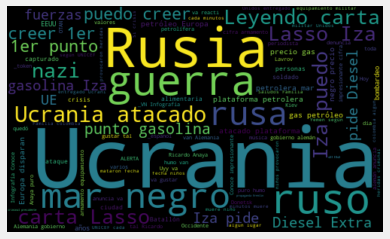

In [100]:
# Imprimir un word cloud sin las palabras irrelevantes(conectores)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
palabras_irrelevantes = stopwords.words('spanish')

allWords = ' '.join([twts for twts in tweets_list['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, stopwords = palabras_irrelevantes).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##Analisis Graficos

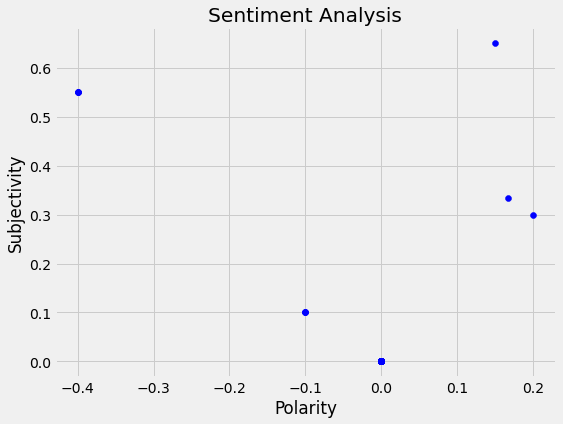

In [101]:
#Graficar los conteos (de positivos, negativos y neutrales.)
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, tweets_list.shape[0]):
  plt.scatter(tweets_list["Polaridad"][i], tweets_list["Subjectividad"][i], color='Blue') 
_
   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

**Analisis porcentual**

In [103]:
#veamos en porcentaje, cuantos tweets son neutrales
ntweets = tweets_list[tweets_list.Analisis == 'Neutral']
ntweets = ntweets['Tweet']
ntweets

round( (ntweets.shape[0] / tweets_list.shape[0]) * 100, 1)

91.0

In [105]:
#veamos en porcentaje, cuantos tweets son Positivos
ntweets = tweets_list[tweets_list.Analisis == 'Positivo']
ntweets = ntweets['Tweet']
ntweets

round( (ntweets.shape[0] / tweets_list.shape[0]) * 100, 1)

3.0

In [107]:
#veamos en porcentaje, cuantos tweets son Positivos
ntweets = tweets_list[tweets_list.Analisis == 'Negativo']
ntweets = ntweets['Tweet']
ntweets

round( (ntweets.shape[0] / tweets_list.shape[0]) * 100, 1)

6.0

In [108]:
# Show the value counts
tweets_list['Analisis'].value_counts()

Neutral     91
Negativo     6
Positivo     3
Name: Analisis, dtype: int64

**Analisis Grafico Circular**

Text(0.5, 1.0, ' Resultados con Text Blob')

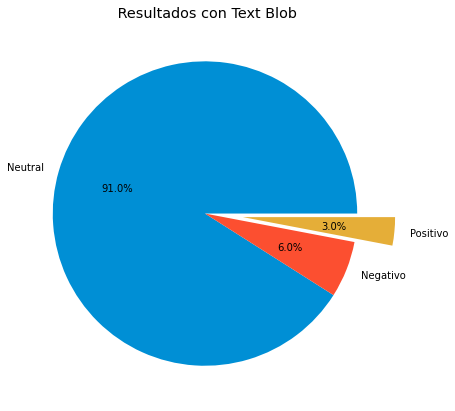

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_counts= tweets_list['Analisis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.title(" Resultados con Text Blob")

**Analisis de Grafico de Barras**


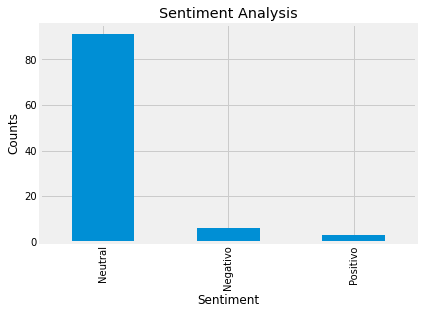

In [110]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_list['Analisis'].value_counts().plot(kind = 'bar')
plt.show()